Date : 04/02/2026

### 📌 What is Linear Regression?

Linear Regression is a Machine Learning algorithm used to predict a continuous value (number).

It finds the relationship between:

Input (X) → feature  
Output (y) → target

and draws a straight line that best fits the data.

#### 📌 Example

| Study Hours (X) | Marks (y) |
| --------------- | --------- |
| 2               | 40        |
| 4               | 60        |
| 6               | 75        |

We want to predict marks when study hours = 5.

##### Linear Regression Equation : y=mx+c

Where:

- y = predicted value
- x = input
- m = slope (coefficient)
- c = intercept

##### In ML terms : y=b0+b1x

📌 Meaning of slope (m)

Slope tells:

If x increases by 1 unit, how much y will increase.

Example:  
m = 5  
→ If study hours increase by 1, marks increase by 5.

📌 Meaning of intercept (c)

Intercept tells:

Value of y when x = 0.

Example:  
c = 10  
→ If study hours = 0, marks = 10.

📌 How does Linear Regression work?

1️⃣ Plot data points on graph  
2️⃣ Draw many possible straight lines  
3️⃣ Choose the line with minimum error  
4️⃣ That line is the best fit line  

📌 Error (Cost Function)

Linear Regression uses Mean Squared Error (MSE):

MSE = 1/n​∑(yactual​−ypredicted​)^2

Model tries to make this error as small as possible.

##### 🧠 What is “Error” in Linear Regression?

Error means : Difference between actual value and predicted value

Formula : Error=Actual value−Predicted value

Example:

Actual marks = 80  
Predicted marks = 70  
Error = 80 − 70 = 10

##### 🧮 What is Mean Squared Error (MSE)?

MSE is just : Average of (error × error) for all data points

Steps:

1. Find error
2. Square it (multiply it by itself)
3. Add all
4. Divide by total number of values

#### 🌟 What is Simple Linear Regression?

Simple Linear Regression is used when:

- You have only one input (X)
- And one output (y)
- And you want to predict a number

It draws a straight line to show the relationship between X and y.

📌 Example

Input (X): Study Hours
Output (y): Marks

| Hours | Marks |
| ----- | ----- |
| 2     | 40    |
| 4     | 60    |
| 6     | 80    |

We want to predict marks for 5 hours.

In [1]:
import pandas as pd     # read dataset
import numpy as np      # math operations
import matplotlib.pyplot as plt     # graph

In [2]:
df=pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
''' 
    In Machine Learning, input features are always treated as a table (matrix):
    Rows = samples (data points)
    Columns = features
'''
x=df[['YearsExperience']]     # feature (must be 2D) (input)
y = df['Salary']              # target (output)

# X = Input (YearsExperience)
# Y = Output (Salary)

### Cross Validation (Holdout Method)

📌 What is Cross Validation?

Cross validation is used to : Check model performance on unseen data and avoid overfitting.

🔹 Holdout Method (Train-Test Split)

This is the simplest cross validation technique.

Steps:

1️⃣ Split data into:

    Training set (70–80%)
    Testing set (20–30%)

2️⃣ Train model on training data  
3️⃣ Test model on testing data

Example:

train_test_split(X, y, test_size=0.2)  
Meaning:  
80% training  
20% testing  

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)

# x_train = 80% experience data (input data for training)
# y_train = 80% salary data     (output / target / answer)
# x_test = 20% experience data  (input)
# y_test = 20% salary data      (actual correct output (already known))

# test_size=0.2 means:
# 20% = test
# 80% = train

| Variable | Meaning                  |
| -------- | ------------------------ |
| x_train  | training input           |
| y_train  | training output (answer) |
| x_test   | testing input            |
| y_test   | testing actual answer    |
| y_pred   | model prediction         |

In [5]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24, 1)
X_test shape: (6, 1)
y_train shape: (24,)
y_test shape: (6,)


In [6]:
df.shape

(30, 2)

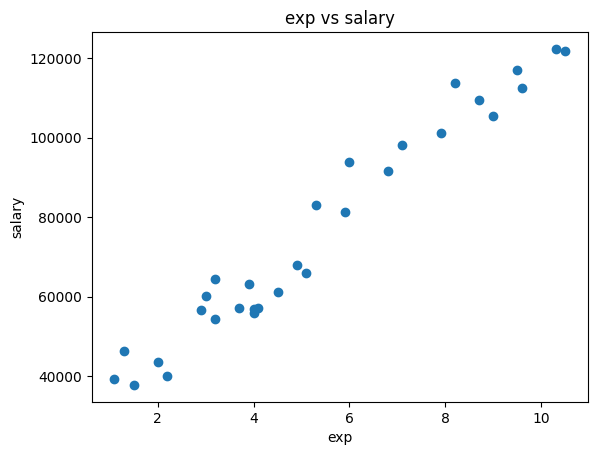

In [7]:
plt.title("exp vs salary")
plt.xlabel('exp')
plt.ylabel("salary")
plt.scatter(df['YearsExperience'], df['Salary']);

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  # from sklearn.linear_model import LinearRegression

In [9]:
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
y_pred=model.predict(x_test)

In [11]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

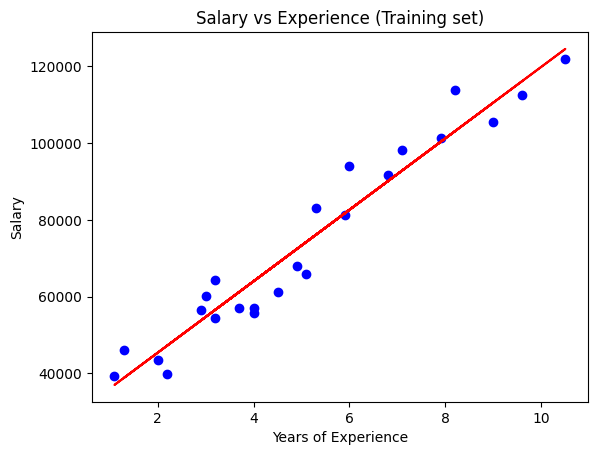

In [12]:
plt.scatter(x_train, y_train, color='blue')     # actual data
plt.plot(x_train, model.predict(x_train), color='red')      # regression line
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()
# Blue dots = actual data
# Red line = predicted line

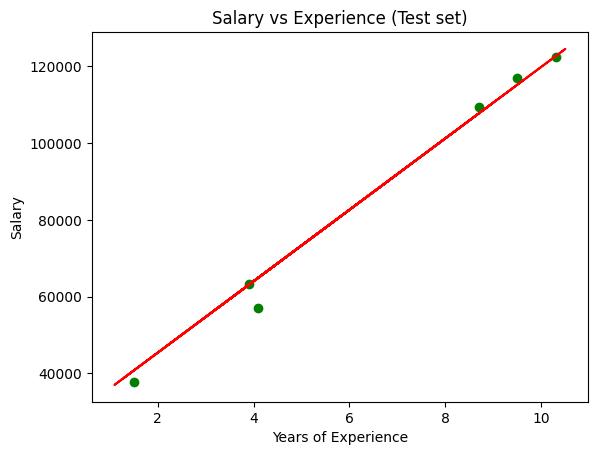

In [13]:
plt.scatter(x_test, y_test, color='green')
plt.plot(x_train, model.predict(x_train), color='red')
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Different Accuracy Metrics for Regression

In Regression, output is a continuous value (number),so we do NOT use classification accuracy (%).  
Instead, we use error-based metrics.

1️⃣ Mean Absolute Error (MAE)

Meaning:
Average of absolute difference between actual and predicted values.

Formula:
MAE = (1/n) Σ (y_actual − y_pred )

Example:  
Actual = 100  
Predicted = 90  
Error = (100 − 90) = 10  

MAE tells:  
👉 On average, how much prediction is wrong.  

Lower MAE = better model.

2️⃣ Mean Squared Error (MSE)

Meaning:
Average of squared difference between actual and predicted values.

Formula:  
MSE = (1/n) Σ (y_actual − y_pred)²

Why square?

- Removes negative sign
- Penalizes large errors more
- Lower MSE = better model.

3️⃣ Root Mean Squared Error (RMSE)

Meaning:  
Square root of MSE.

Formula:  
RMSE = √MSE  

Advantage:

- Same unit as target (e.g. salary, marks)
- Easy to interpret
- Lower RMSE = better model.

4️⃣ R² Score (Coefficient of Determination)

Meaning:
Shows how much variation in output is explained by the model.

Range:
0 to 1 (can be negative for bad model)

Example:

R² = 0.90 → 90% data explained  
R² = 0.50 → 50% data explained

Higher R² = better model.

- MAE, MSE, RMSE → tell how wrong the model is
- R² → tells how good the model is

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [15]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
# On average, how much salary prediction is wrong.

MAE: 2446.1723690465055


In [16]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
# Average of squared errors (big mistakes punished more).

MSE: 12823412.298126549


In [17]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)
# Average error in same unit (Salary).

RMSE: 3580.979237321343


In [18]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
# How good the model fits data.

R2 Score: 0.988169515729126


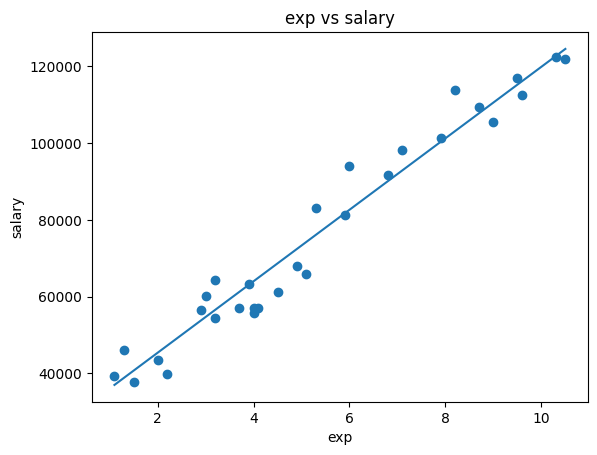

In [19]:
plt.title("exp vs salary")
plt.xlabel('exp')
plt.ylabel("salary")
plt.scatter(df['YearsExperience'], df['Salary']);
plt.plot(x, model.predict(x));

In [20]:
model.coef_     # slope(m)

array([9312.57512673])

In [21]:
model.intercept_        # intercept(c)

np.float64(26780.09915062818)

In [22]:
model.predict([[12.5]])     # x

c:\Users\Vaishnavi Giri\Desktop\@GPP\Internship\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([143187.28823474])

In [23]:
9312.57512673*12.5+(26780.09915062818)      # y=mx+c

143187.28823475318